In [4]:
## importer les packages
import numpy as np
import pandas as ps

In [10]:
### Importer la data
df1=ps.read_csv('Youtube01-Psy.csv')
#df2=ps.read_csv('Youtube02-KatyPerry.csv')
#df3=ps.read_csv('Youtube05-Shakira.csv')
#df4=ps.read_csv('Youtube04-Eminem.csv')
#corpus=ps.concat([df1,df2,df3,df4])
corpus=ps.concat([df1])
#print(corpus.shape)
#print(corpus.head())

In [11]:
### Extraire la variable Texte
corpus1=corpus['CONTENT']
corpus1.head(1)

0    Huh, anyway check out this you[tube] channel: ...
Name: CONTENT, dtype: object

In [12]:
# import and instantiate the vectorizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
vectorizer = CountVectorizer()
#vectorizer1=TfidfVectorizer()

In [13]:
## créer la matrice de données
X_vect= vectorizer.fit_transform(corpus1)
print(X_vect.shape)

(350, 1418)


In [14]:
### Les variables (tokens)
vectorizer.get_feature_names_out()

array(['00', '000', '02', ..., 'ｆａｎｃy', 'ｉｓ', 'ｔｈｉｓ'], dtype=object)

In [15]:
### Afficher la matrice des données
X_vect_n=X_vect.toarray()
#print(X_vect)
print(X_vect_n)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [16]:
### Application de l'ACP pour réduire la dimension
## Centrer et réduire les données
X_c=X_vect_n-np.mean(X_vect_n,axis=0)
#print(np.mean(X_c,axis=0))
ecartype=np.std(X_c,axis=0)
print(ecartype)
X_cr=X_c/np.std(ecartype)
#ecartype1=np.std(X_cr,axis=0)
#print(ecartype1)

[0.05337583 0.41210262 0.05337583 ... 0.05337583 0.05337583 0.05337583]


In [18]:
### La matrice de corrécation
R=1/(X_cr.shape[0])*np.dot(X_cr.T,X_cr)
print(R)

[[ 3.50007135e-01 -1.40404008e-02 -1.00288577e-03 ... -1.00288577e-03
  -1.00288577e-03 -1.00288577e-03]
 [-1.40404008e-02  2.08640357e+01 -1.40404008e-02 ... -1.40404008e-02
  -1.40404008e-02 -1.40404008e-02]
 [-1.00288577e-03 -1.40404008e-02  3.50007135e-01 ... -1.00288577e-03
  -1.00288577e-03 -1.00288577e-03]
 ...
 [-1.00288577e-03 -1.40404008e-02 -1.00288577e-03 ...  3.50007135e-01
   3.50007135e-01  3.50007135e-01]
 [-1.00288577e-03 -1.40404008e-02 -1.00288577e-03 ...  3.50007135e-01
   3.50007135e-01  3.50007135e-01]
 [-1.00288577e-03 -1.40404008e-02 -1.00288577e-03 ...  3.50007135e-01
   3.50007135e-01  3.50007135e-01]]


In [19]:
### Trouver les valeurs propres et les vecteurs propres de cette matrice
from numpy.linalg import eig
Lamda,V=eig(R)

In [20]:
print(Lamda.sort())

None


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from sklearn.datasets import make_blobs

# Step 1: Import libraries
# Already done above

In [6]:
#Step 2: Load or generate data
# Let's generate a synthetic dataset with more than 4 dimensions
data, _ = make_blobs(n_samples=1000, centers=5, n_features=5, random_state=42)
df = pd.DataFrame(data, columns=[f'Feature_{i}' for i in range(1, 6)])

In [7]:
# Step 3: Visualize and inspect data
print(df.head())
print("Shape of the data:", df.shape)

   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5
0  -6.881514  -5.560748   2.000674  -0.196516  -4.262673
1  -1.286027   8.330854   4.130021  -0.511442  -5.959800
2  -0.233436   9.420513   4.207937   3.833137  -5.679216
3  -1.985245   8.426199   4.506478   3.044166  -7.462428
4   3.196498  -5.924738  -4.782688  -3.071199   0.364712
Shape of the data: (1000, 5)


In [8]:
# Step 4: Implement K-means with different initialization strategies
# Random initialization
kmeans_random = KMeans(n_clusters=5, init='random', random_state=42)
kmeans_random.fit(df)

KMeans(init='random', n_clusters=5, random_state=42)

In [9]:
# K-means++ initialization
kmeans_plus = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans_plus.fit(df)

KMeans(n_clusters=5, random_state=42)

In [10]:
# Step 5: Evaluate clustering
# Using Calinski-Harabasz index
ch_random = calinski_harabasz_score(df, kmeans_random.labels_)
ch_plus = calinski_harabasz_score(df, kmeans_plus.labels_)

print(f"Calinski-Harabasz Index (Random Initialization): {ch_random}")
print(f"Calinski-Harabasz Index (K-means++ Initialization): {ch_plus}")


Calinski-Harabasz Index (Random Initialization): 6360.204657685491
Calinski-Harabasz Index (K-means++ Initialization): 6360.204657685489


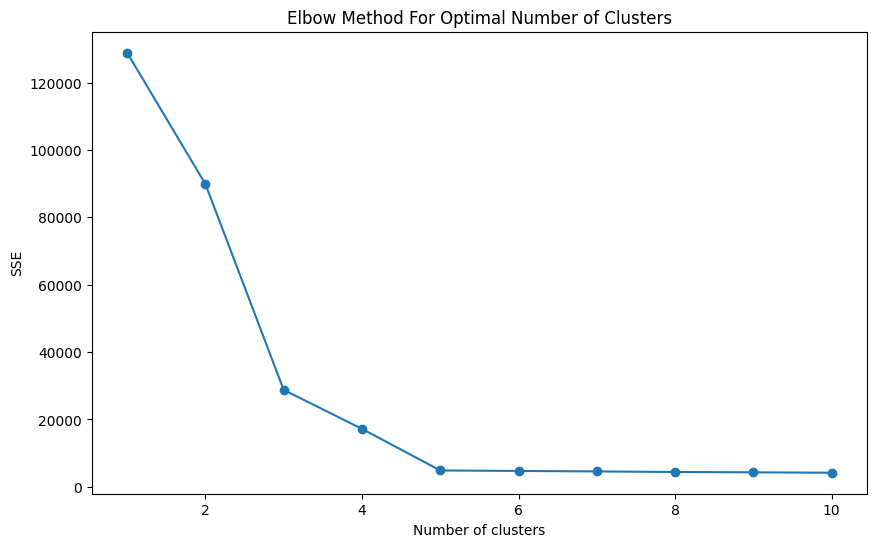

In [11]:
# Elbow method to determine the optimal number of clusters
def plot_elbow_method(data):
    sse = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), sse, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('SSE')
    plt.title('Elbow Method For Optimal Number of Clusters')
    plt.show()

plot_elbow_method(df)

In [12]:
# Step 6: Implement validation methods (Calinski-Harabasz already implemented)

# Step 7: Determine the best clustering model based on evaluation metrics
best_model = kmeans_plus if ch_plus > ch_random else kmeans_random
print("Best model based on Calinski-Harabasz index:", "K-means++" if best_model == kmeans_plus else "Random")

Best model based on Calinski-Harabasz index: Random


In [13]:
# Step 8: Represent data with cluster centers' weights (Centroids)
centroids = best_model.cluster_centers_
print("Cluster centroids:\n", centroids)


Cluster centroids:
 [[ 2.34983949 -7.20734229 -4.30851432 -2.6637292  -0.94248589]
 [-6.35150252 -3.7970761   0.54124074 -1.36765099 -4.25513844]
 [-2.46119176  9.03138845  4.68343079  1.99907824 -6.83966524]
 [-6.87160022 -8.85753481  7.38771626  2.04526237  4.04973537]
 [-9.70761518  9.36278756  6.60667339 -5.69304597 -6.40048077]]


In [15]:
from sklearn.decomposition import PCA

In [16]:
# Step 9: Principal Component Analysis (PCA)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df)

In [17]:
# a. New observation matrix
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
print("PCA Transformed Data:\n", pca_df.head())

PCA Transformed Data:
         PC1       PC2
0 -3.884881  1.274854
1  8.154104 -3.648881
2  8.383347 -3.665277
3  8.705738 -2.955275
4 -9.389207 -8.270512


In [18]:
# b. Eigenvalues and eigenvectors
print("Eigenvalues:", pca.explained_variance_)
print("Eigenvectors:\n", pca.components_)

Eigenvalues: [83.03950323 29.75685638]
Eigenvectors:
 [[-0.20672113  0.86482392  0.23969032 -0.09392659 -0.378249  ]
 [-0.60839262 -0.16862596  0.68015376  0.15174463  0.34027654]]


In [19]:
# c. Inertia of each axis
print("Inertia of each principal component axis:", pca.explained_variance_)

Inertia of each principal component axis: [83.03950323 29.75685638]


In [20]:
# d. Verify the sum of inertias
print("Sum of inertias (should be equal to the total variance):", np.sum(pca.explained_variance_))


Sum of inertias (should be equal to the total variance): 112.79635961413224


C:\Users\21269\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


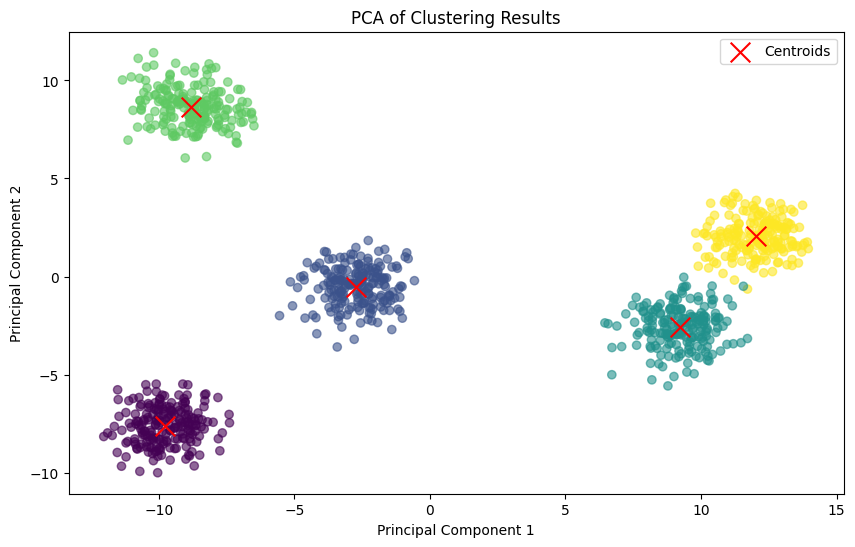

In [21]:
# e. Plot data and cluster centers on principal axes
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=best_model.labels_, cmap='viridis', marker='o', alpha=0.6)
centroids_pca = pca.transform(centroids)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Clustering Results')
plt.legend()
plt.show()

In [22]:
# f. Interpret results
print("PCA shows the clustering results on the first two principal components. Red crosses indicate cluster centroids.")

PCA shows the clustering results on the first two principal components. Red crosses indicate cluster centroids.
